## SALES DATA ANALYSIS

* which product line have the highest and lowest sales? create a chart  that is representable
* show sales performance over time, is there any pattern?
* how does deal size (small, medium, large) correlate with total sales? what is the percentage of contribution for each type of deal?


In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Data/Sales Data Revou.xlsx")
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium
...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small


* ORDERNUMBER: A unique identifier for each sales order
* QUANTITYORDERED: The number of units ordered for a particular product
* PRICEEACH: The price of a single unit of the product
* ORDERDATE: The date when the order was placed
* STATUS: The current status of the order (Shipped, canceled, on hold)
* PRODUCTLINE: The category or line to which the product belongs
* PRODUCTCODE: A unique code identifying the product
* CUSTOMERNAME: The name of the customer who placed the order
* CITY: The city where tthe customers is located
* DEALSIZE: The size category of the deal (Small, medium, large)

In [3]:
#Ketahui kategori pada PRODUCTLINE
data['PRODUCTLINE'].unique()

array(['Vintage Cars', 'Classic Cars', 'Trucks and Buses', 'Trains',
       'Ships', 'Planes', 'Motorcycles'], dtype=object)

### which product line have the highest and lowest sales? create a chart that is representable

In [4]:
data['TOTALSALES'] = data['QUANTITYORDERED'] * data['PRICEEACH']

In [5]:
total_sales_per_product_line = data.groupby('PRODUCTLINE')['TOTALSALES'].sum().reset_index()

In [6]:
total_sales_per_product_line = total_sales_per_product_line.sort_values(by='TOTALSALES', ascending=False)

In [7]:
print(total_sales_per_product_line)

        PRODUCTLINE  TOTALSALES
0      Classic Cars  2968546.40
6      Vintage Cars  1646013.29
1       Motorcycles   971086.29
5  Trucks and Buses   947355.18
2            Planes   877942.21
3             Ships   677940.40
4            Trains   203804.26


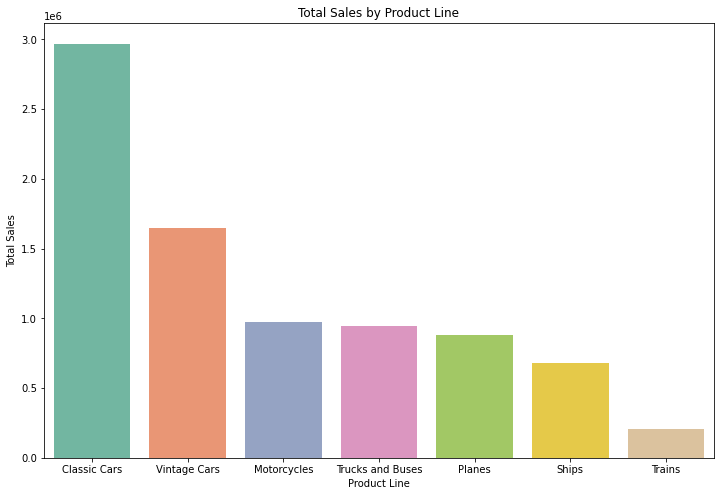

In [8]:
# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=total_sales_per_product_line, x='PRODUCTLINE', y='TOTALSALES', palette='Set2')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

Produt line that have the highest sale is classic cars,
Produt line that have the lowest sales is Trains

### show sales performance over time, is there any pattern?

In [9]:
from datetime import datetime

In [10]:
# Ubah tipe data
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [11]:
data1 = data.copy()

In [12]:
# Total sales on January 2003
sales_per_january = data1[(data1['ORDERDATE'].dt.year>=2003)&(data1['ORDERDATE'].dt.year<=2005)]

total_sales_january = sales_per_january.groupby('ORDERDATE')['TOTALSALES'].sum().reset_index()

In [13]:
print(total_sales_january)

     ORDERDATE  TOTALSALES
0   2003-01-06     9982.25
1   2003-01-09     8976.96
2   2003-01-10     5955.74
3   2003-01-29    47886.21
4   2003-01-31    35084.80
..         ...         ...
247 2005-05-13    24502.48
248 2005-05-17    46475.40
249 2005-05-29    47187.74
250 2005-05-30    14578.75
251 2005-05-31    58835.29

[252 rows x 2 columns]


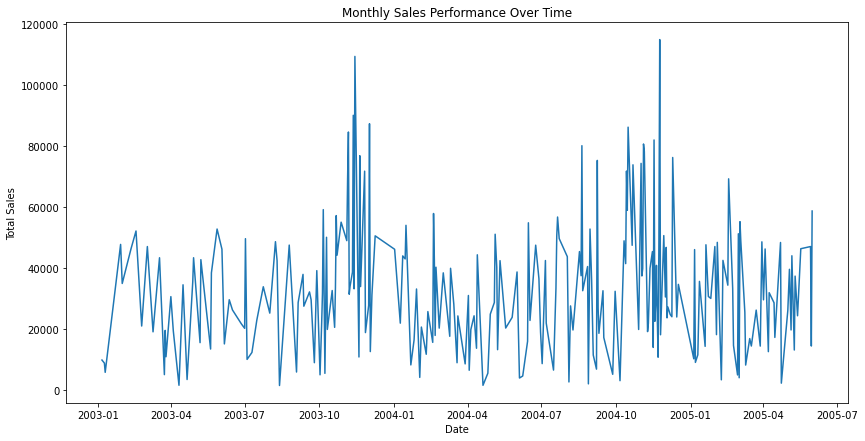

In [14]:
# Monthly sales plot
plt.figure(figsize=(14,7))
sns.lineplot(data=total_sales_january, x='ORDERDATE', y='TOTALSALES')
plt.title('Monthly Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### how does deal size (small, medium, large) correlate with total sales? what is the percentage of contribution for each type of deal?